In [20]:
from sklearn import datasets, model_selection, linear_model, metrics
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import requests

In [39]:
df = pd.read_csv("US-pumpkins.csv")
df.describe(include = [object])

,City Name,Type,Package,Variety,Sub Variety,Date,Origin,Origin District,Item Size,Color,Unit of Sale,Repack,Unnamed: 25
count,1757,45,1757,1752,296,1757,1754,131,1478,1141,162,1757,103
unique,13,1,15,10,2,57,24,5,7,3,4,2,4
top,BOSTON,Organic,36 inch bins,HOWDEN TYPE,FLAT TYPE,10/8/16,PENNSYLVANIA,QUEBEC,sml,ORANGE,PER BIN,N,LOWER.
freq,352,45,663,542,212,180,250,48,363,916,98,1752,41


In [31]:
df.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [40]:
new_columns = ["Package", "Month", "Low Price", "High Price", "Date"]
df = df.drop([c for c in df.columns if c not in new_columns], axis=1)

In [41]:
df["Price"] = (df["High Price"] + df["Low Price"])/2
df["Month"] = pd.DatetimeIndex(df["Date"]).month
df = df[["Month", "Package", "Low Price", "High Price", "Price"]]
df.head()

,Month,Package,Low Price,High Price,Price
0,4,24 inch bins,270.0,280.0,275.0
1,5,24 inch bins,270.0,280.0,275.0
2,9,24 inch bins,160.0,160.0,160.0
3,9,24 inch bins,160.0,160.0,160.0
4,11,24 inch bins,90.0,100.0,95.0


In [42]:
df.Package.value_counts()

36 inch bins            663
24 inch bins            551
1/2 bushel cartons      234
1 1/9 bushel cartons    117
35 lb cartons            42
bushel cartons           37
40 lb cartons            19
1 1/9 bushel crates      17
each                     17
bins                     13
50 lb sacks              11
50 lb cartons            10
22 lb cartons            10
bushel baskets           10
20 lb cartons             6
Name: Package, dtype: int64

In [43]:
df = df[df.Package.str.contains("bushel", case=True, regex=True)]

#Normalizing prices
price = df["Price"]
df.loc[df["Package"].str.contains("1 1/2"),"Price"] = price/(1+ 1/2)
df.loc[df["Package"].str.contains("1 1/9"),"Price"] = price/(1+ 1/9)

In [44]:
df.head()

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.0,15.0,13.5
71,9,1 1/9 bushel cartons,18.0,18.0,16.2
72,10,1 1/9 bushel cartons,18.0,18.0,16.2
73,10,1 1/9 bushel cartons,17.0,17.0,15.3
74,10,1 1/9 bushel cartons,15.0,15.0,13.5


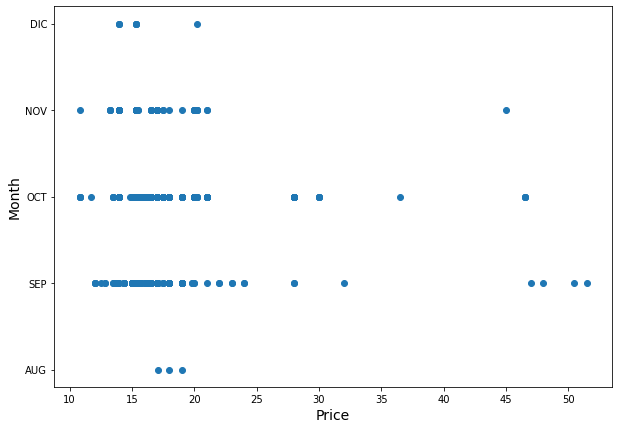

In [51]:
plt.figure(figsize=(10,7))
plt.scatter(df.Price, df.Month)
plt.ylabel("Month",{"size":14})
plt.xlabel("Price",{"size":14})
plt.yticks(ticks=[i for i in range(8,13)], labels=["AUG","SEP","OCT","NOV","DIC"])
_ = plt.show()

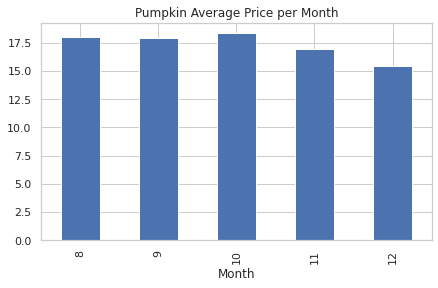

In [74]:
plt.figure(figsize=(7,4))
df.groupby("Month")["Price"].mean().plot(kind = "bar")
_ = plt.title("Pumpkin Average Price per Month")

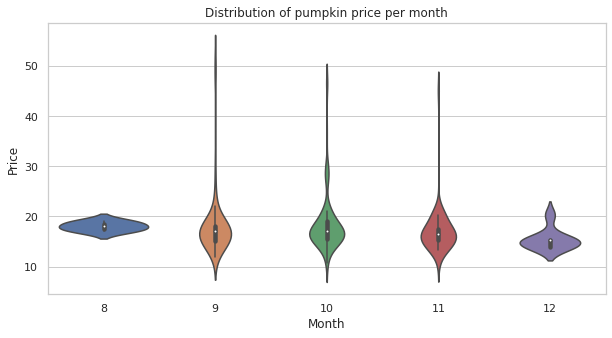

In [72]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
plt.title("Distribution of pumpkin price per month")
_ = sns.violinplot(x="Month", y = "Price", data = df)